In [1]:
import pandas as pd
import numpy as np
from pyspark.sql import SparkSession
import fastparquet

In [2]:
# Create a Spark session
spark = SparkSession.builder.appName("Convert to Parquet").getOrCreate()

In [3]:
# Replace 'your_file.csv' with your actual file path
df_train = spark.read.csv('/Users/yonah/Desktop/project/Project Data/ProjectTrainingData.csv', header=True, inferSchema=True)

In [4]:
# Convert the Spark DataFrame to a Parquet file
df_train.write.parquet('/Users/yonah/Desktop/project/Project Data/ProjectTrainingData.parquet')

In [5]:
df_test = spark.read.csv('/Users/yonah/Desktop/project/Project Data/ProjectTestData.csv', header=True, inferSchema=True)

In [6]:
# Convert the Spark DataFrame to a Parquet file
df_test.write.parquet('/Users/yonah/Desktop/project/Project Data/ProjectTestData.parquet')

In [7]:
train_data = pd.read_parquet("/Users/yonah/Desktop/project/Project Data/ProjectTrainingData.parquet", engine="fastparquet")

In [8]:
test_data = pd.read_parquet("/Users/yonah/Desktop/project/Project Data/ProjectTestData.parquet", engine="fastparquet")

In [9]:
submission = pd.read_csv("/Users/yonah/Desktop/project/Project Data/ProjectSubmission-TeamX.csv")

In [10]:
train_data.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [11]:
test_data.head()

,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,3.295858e+18,14102809,1005,1,85f751fd,c4e18dd6,50e219e0,1dc72b4d,2347f47a,0f2161f8,...,1,0,8334,300,50,761,3,175,100075,23
1,1.228170e+19,14103120,1007,0,85f751fd,c4e18dd6,50e219e0,8311368f,1dc9b529,0f2161f8,...,1,2,24303,320,50,2788,3,295,100194,240
2,4.638380e+18,14103109,1005,0,4e7614cf,c1aa3c04,f028772b,ecad2386,7801e8d9,07d7df22,...,1,0,24165,320,50,2776,0,35,-1,79
3,1.703980e+19,14103101,1002,0,48c42b43,de0f0f82,50e219e0,ecad2386,7801e8d9,07d7df22,...,0,0,23438,320,50,2684,2,1327,-1,52
4,5.753064e+18,14103119,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,...,1,0,24084,320,50,2761,2,35,100148,13


In [12]:
submission.head()

,id,P(click)
0,3295858251275419735,0.5
1,12281702837842634283,0.5
2,4638380339534007785,0.5
3,17039804736879076347,0.5
4,5753064066292192109,0.5


In [13]:
len(submission)

13015341

In [14]:
submission.nunique()

id          13015338
P(click)           1
dtype: int64

In [15]:
len(submission)

13015341

In [16]:
submission.nunique()

id          13015338
P(click)           1
dtype: int64

In [17]:
train_data.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [18]:
import matplotlib.pyplot as plt

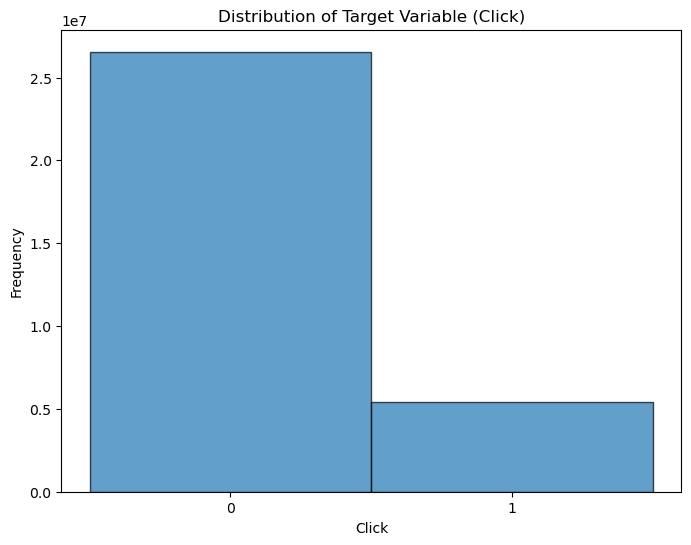

In [19]:
# Plotting the histogram for the target variable 'click'
plt.figure(figsize=(8, 6))
plt.hist(train_data['click'], bins=[-0.5, 0.5, 1.5], edgecolor='black', alpha=0.7)
plt.xlabel('Click')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable (Click)')
plt.xticks([0, 1])
plt.show()

In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31991090 entries, 0 to 31991089
Data columns (total 24 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id                float64
 1   click             int32  
 2   hour              int32  
 3   C1                int32  
 4   banner_pos        int32  
 5   site_id           object 
 6   site_domain       object 
 7   site_category     object 
 8   app_id            object 
 9   app_domain        object 
 10  app_category      object 
 11  device_id         object 
 12  device_ip         object 
 13  device_model      object 
 14  device_type       int32  
 15  device_conn_type  int32  
 16  C14               int32  
 17  C15               int32  
 18  C16               int32  
 19  C17               int32  
 20  C18               int32  
 21  C19               int32  
 22  C20               int32  
 23  C21               int32  
dtypes: float64(1), int32(14), object(9)
memory usage: 4.1+ GB


In [21]:
len(train_data)

31991090

In [22]:
train_data.nunique()

id                  31991090
click                      2
hour                     216
C1                         7
banner_pos                 7
site_id                 4581
site_domain             7341
site_category             26
app_id                  8088
app_domain               526
app_category              36
device_id            2296165
device_ip            5762925
device_model            8058
device_type                5
device_conn_type           4
C14                     2465
C15                        8
C16                        9
C17                      407
C18                        4
C19                       66
C20                      171
C21                       55
dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, log_loss
from xgboost import XGBClassifier

categorical_cols = [
 'hour',
 'C1',
 'banner_pos',
 'site_id',
 'site_domain',
 'site_category',
 'app_domain',
 'app_category',
 'device_model',
 'device_type',
 'device_conn_type',
 'C15',
 'C16',
 'C18',
 'C19',
 'C20',
 'C21']

# Applying label encoding to each categorical column
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    label_encoders[col] = le
    
# Splitting the dataset
X, y = train_data[categorical_cols], train_data['click']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
# Initialize the decision tree classifier
dt_clf = DecisionTreeClassifier()

# Fit the model
dt_clf.fit(X_train, y_train)

# Predict probabilities for the test set
dt_probs = dt_clf.predict_proba(X_test)

# Calculate ROC AUC and Log Loss
dt_roc_auc = roc_auc_score(y_test, dt_probs[:, 1])
dt_log_loss = log_loss(y_test, dt_probs)

# Print the results
print(f"Decision Tree ROC AUC: {dt_roc_auc:.2f}")
print(f"Decision Tree Log Loss: {dt_log_loss:.2f}\n")

Decision Tree ROC AUC: 0.68
Decision Tree Log Loss: 2.68



In [24]:
# Initialize the XGBClassifier
xgb_clf = XGBClassifier(n_estimators=100, max_depth=15, min_child_weight=2, subsample=0.8)

# Fit the model
xgb_clf.fit(X_train, y_train)

# Predict probabilities for the test set
xgb_probs = xgb_clf.predict_proba(X_test)

# Calculate ROC AUC and Log Loss
xgb_roc_auc = roc_auc_score(y_test, xgb_probs[:, 1])
xgb_log_loss = log_loss(y_test, xgb_probs)

# Print the results
print(f"XGBoost ROC AUC: {xgb_roc_auc:.2f}")
print(f"XGBoost Log Loss: {xgb_log_loss:.2f}")

XGBoost ROC AUC: 0.76
XGBoost Log Loss: 0.39


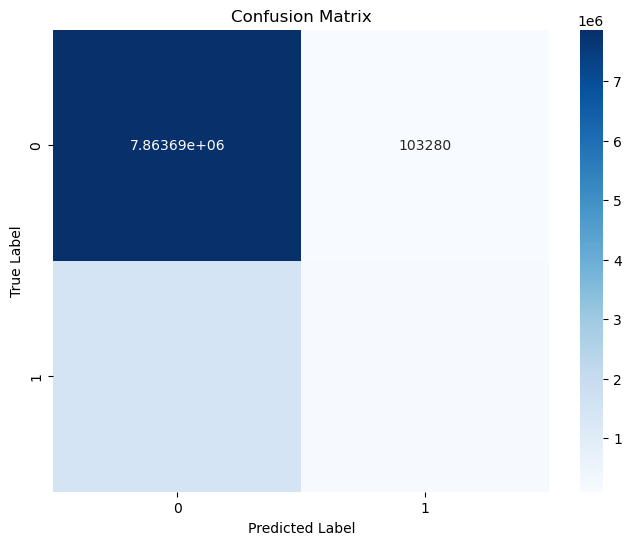

In [31]:
from sklearn.metrics import roc_curve, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict class labels for the test set
xgb_preds = xgb_clf.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
xgb_accuracy = accuracy_score(y_test, xgb_preds)
xgb_precision = precision_score(y_test, xgb_preds)
xgb_recall = recall_score(y_test, xgb_preds)
xgb_f1 = f1_score(y_test, xgb_preds)


# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, xgb_preds)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


XGBoost Accuracy: 0.84
XGBoost Precision: 0.60
XGBoost Recall: 0.09
XGBoost F1 Score: 0.16


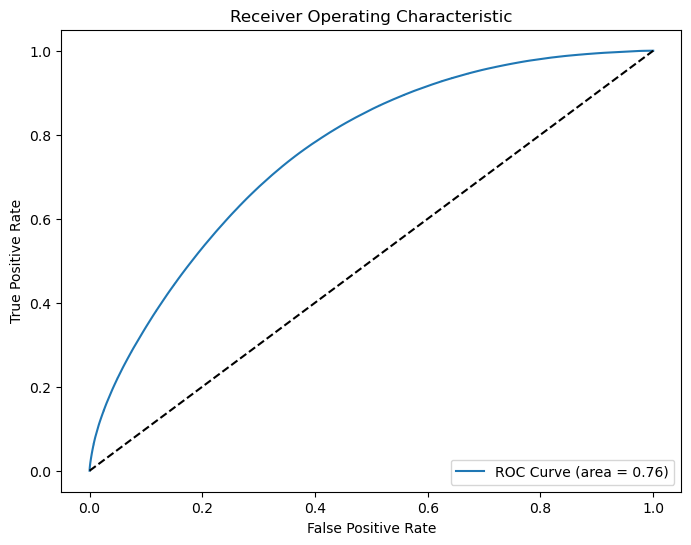

In [33]:
# Print the results
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}")
print(f"XGBoost Precision: {xgb_precision:.2f}")
print(f"XGBoost Recall: {xgb_recall:.2f}")
print(f"XGBoost F1 Score: {xgb_f1:.2f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, xgb_probs[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random chance line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [25]:
for col in categorical_cols:
    # Add -1 to the classes of the encoder
    label_encoders[col].classes_ = np.append(label_encoders[col].classes_, -1)

    # Find labels in test data that are not in the corresponding encoder's classes
    unseen_labels = set(test_data[col]).difference(label_encoders[col].classes_)

    if unseen_labels:
        # Replace unseen labels with '-1'
        test_data[col] = test_data[col].apply(lambda x: x if x in label_encoders[col].classes_ else -1)

    # Now transform the test data
    test_data[col] = label_encoders[col].transform(test_data[col])

test_X = test_data[categorical_cols]

In [26]:
# Predict probabilities for the test set
test_probs = xgb_clf.predict_proba(test_X)[:, 1]

# Prepare the submission DataFrame
submission = pd.DataFrame({
    'id': test_data['id'],
    'P(click)': test_probs
})

In [27]:
# Save the DataFrame to a CSV file
submission.to_csv("/Users/yonah/Desktop/project/Project Data/ProjectSubmission-22.csv", index=False)

In [28]:
# Stop the Spark session
spark.stop()